# logistic regression


used for classification(categorical)
binary classification--- yes/no questions   email/spam
multiclass classification----more than two categories

z=1/1+e pow-z

binary classification

In [45]:
import os
import matplotlib.pyplot as plt

In [46]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [47]:
os.chdir("D:\csv files")
data=pd.read_csv("HR_comma_sep.csv")

In [48]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [49]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [50]:
data.groupby('left').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<AxesSubplot:xlabel='salary'>

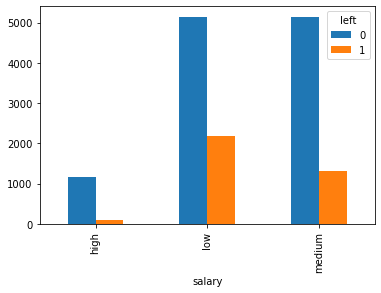

In [51]:
pd.crosstab(data["salary"],data["left"]).plot(kind="bar")

<AxesSubplot:xlabel='satisfaction_level'>

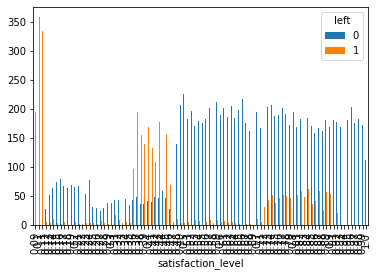

In [52]:
pd.crosstab(data["satisfaction_level"],data["left"]).plot(kind="bar")

<AxesSubplot:xlabel='time_spend_company'>

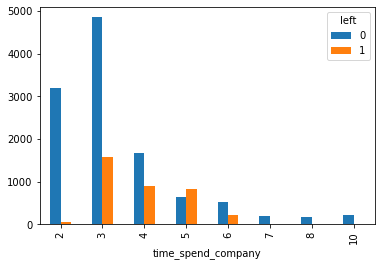

In [53]:
pd.crosstab(data["time_spend_company"],data["left"]).plot(kind="bar")

In [54]:
data["time_spend_company"].mean()

3.498233215547703

<AxesSubplot:xlabel='Department'>

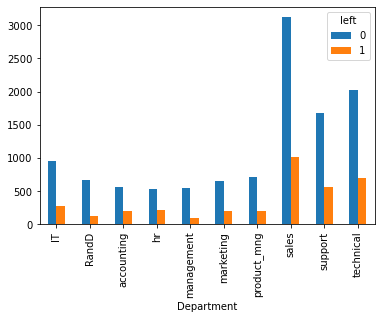

In [55]:
pd.crosstab(data["Department"],data["left"]).plot(kind="bar")

In [56]:
dummies=pd.get_dummies(data["salary"])
dummies

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [57]:
merged=pd.concat([data,dummies],axis="columns")
merged

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,high,low,medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,support,low,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,support,low,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,support,low,0,1,0


In [58]:
final=merged.drop(["salary"],axis='columns')
final

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,high,low,medium
0,0.38,0.53,2,157,3,0,1,0,sales,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,support,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,support,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,support,0,1,0


In [59]:
x=final.drop(["time_spend_company","number_project","last_evaluation","Work_accident","Department","left"],axis="columns")

In [60]:
x

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0
...,...,...,...,...,...,...
14994,0.40,151,0,0,1,0
14995,0.37,160,0,0,1,0
14996,0.37,143,0,0,1,0
14997,0.11,280,0,0,1,0


In [61]:
data["promotion_last_5years"].mean()

0.021268084538969265

In [62]:
y=final.left
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [65]:
x_train

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
11914,0.74,273,0,0,0,1
5449,0.54,265,0,0,1,0
4194,0.59,146,0,0,0,1
13537,0.82,150,0,0,0,1
633,0.38,154,0,0,1,0
...,...,...,...,...,...,...
8207,1.00,186,0,0,1,0
13041,0.59,200,0,0,0,1
3725,0.86,146,0,0,0,1
3260,0.58,220,0,0,0,1


In [66]:
reg=linear_model.LogisticRegression()

In [67]:
reg.fit(x_train,y_train)

LogisticRegression()

In [68]:
reg.predict(x_test)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [69]:
reg.score(x_test,y_test)

0.7836666666666666